In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas


CARGAR DATASET

In [17]:
data = pd.read_excel("IA.xlsx")

print("Primeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
   EDAD  CICLO_REGULAR  USO_ANTICONCEPTIVOS  RELACIONES_ACTIVAS  EMBARAZO
0    21              1                    0                   0         0
1    34              0                    0                   0         0
2    43              1                    1                   0         0
3    29              0                    0                   1         0
4    25              1                    0                   0         0


DEFINIR VARIABLES

In [18]:
X = data[["EDAD", "CICLO_REGULAR", "USO_ANTICONCEPTIVOS", "RELACIONES_ACTIVAS"]]
y = data["EMBARAZO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



ENTRENAR MODELO

In [19]:
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X, y)



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


EVALUAR MODELO 

In [20]:
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {acc:.2f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud del modelo: 0.69

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       178
           1       0.61      0.65      0.63       122

    accuracy                           0.69       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.69      0.69       300



DIBUJAR ÁRBOL 

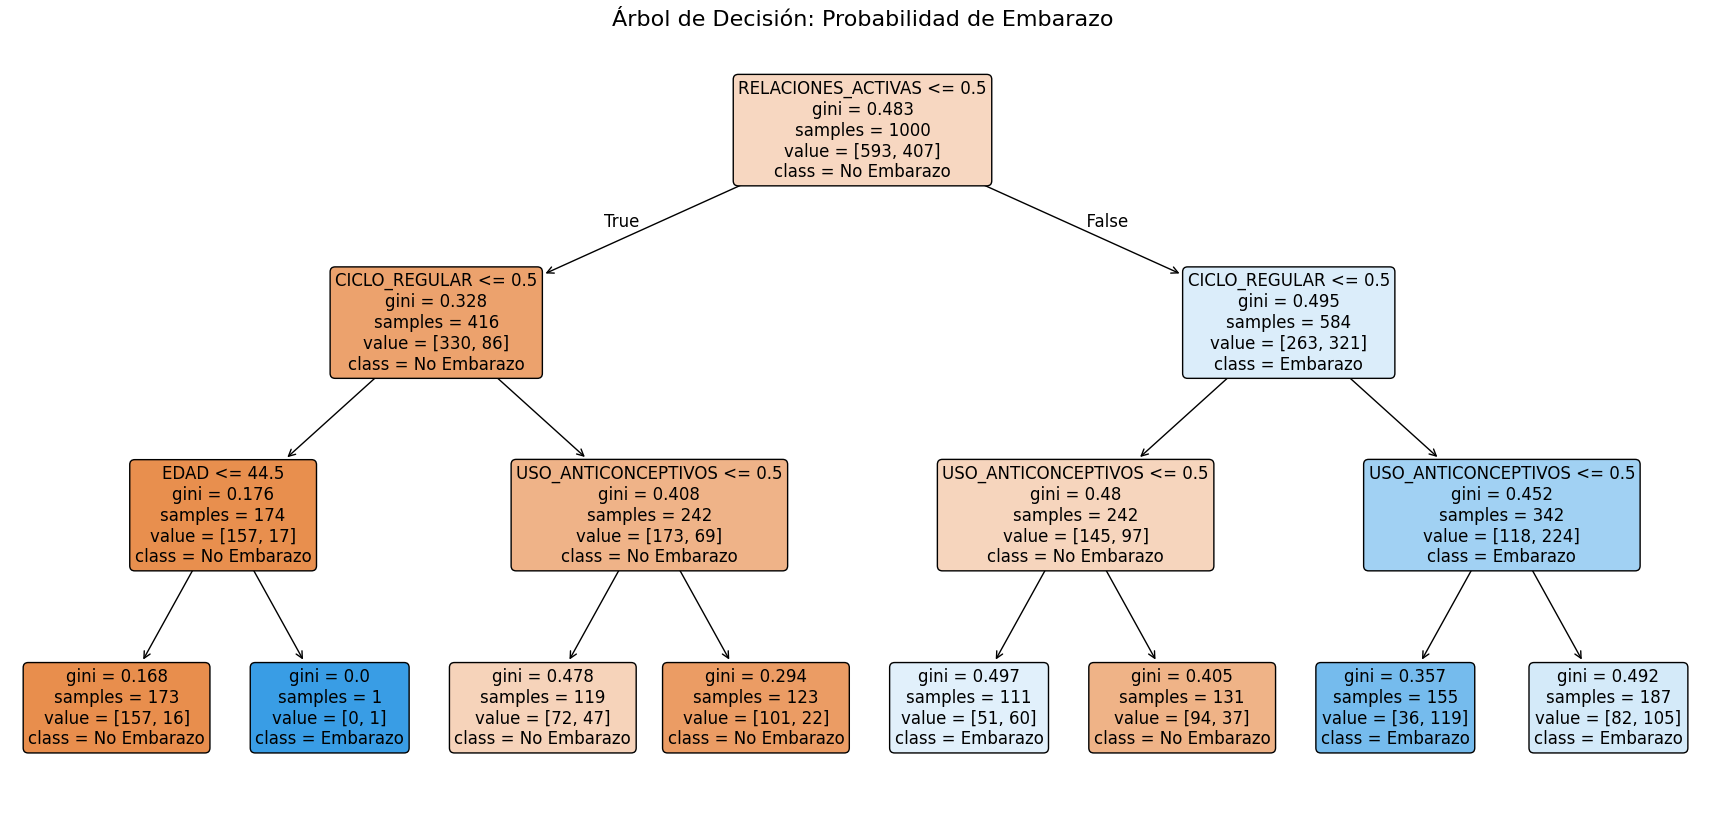

In [21]:
plt.figure(figsize=(22, 10))
plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=['No Embarazo', 'Embarazo'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Árbol de Decisión: Probabilidad de Embarazo", fontsize=16)
plt.savefig("arbol_embarazo.png")
plt.show()
